# Working with Audio in python

This notebook is intended to be an introduction to interperating audio data using python. Specifically, we'll be using samples of the "oud" musical instrument and document the extractions we made using the *librosa* library   
Help guide: https://librosa.org/doc/latest/tutorial.html 

### Imports 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

from glob import glob

import librosa
import librosa.display
import IPython.display as ipd

from itertools import cycle

sns.set_theme(style="white", palette=None)
color_pal=plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

### Sample rate
Sample rate is specific to how the computer reads in the audio file

In [33]:
audio_files = glob(r"C:\Users\Ali Sobh\Desktop\Github\MIL\Extraction of audio\Audio samples\sample.mp3")
if audio_files:
	display(ipd.Audio(audio_files[0]))
else:
	print("No audio files found.")

In [35]:
y,sr=librosa.load(audio_files[0])
print(f"Y:{y[:4]}")
print(f"Shape of y:{y.shape}")
print(f"SR:{sr}")

Y:[-3.2596290e-09 -3.2596290e-09 -5.8207661e-09 -3.4924597e-09]
Shape of y:(1324544,)
SR:22050


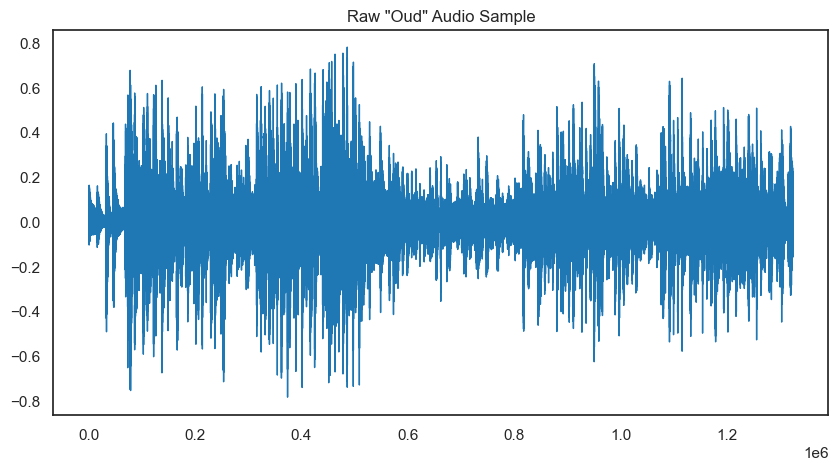

In [23]:
#Plot as panda series
pd.Series(y).plot(figsize=(10,5),
                  lw=1,
                  title="Raw \"Oud\" Audio Sample",
                  color=color_pal[0])
plt.show()

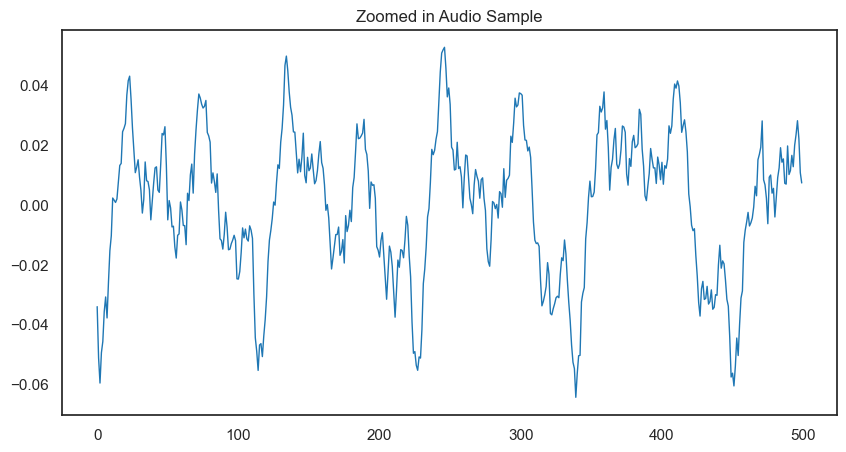

In [36]:
#Zoomed in example
pd.Series(y[40000:40500]).plot(figsize=(10,5),
                  lw=1,
                  title="Zoomed in Audio Sample",
                  color=color_pal[0])
plt.show()

### Spectrogram

In [37]:
#Apply short-time Fourier Transform
D=librosa.stft(y)
#Transform to Decibels and take the absolute value
S_db=librosa.amplitude_to_db(np.abs(D),ref=np.max)
S_db.shape

(1025, 2588)

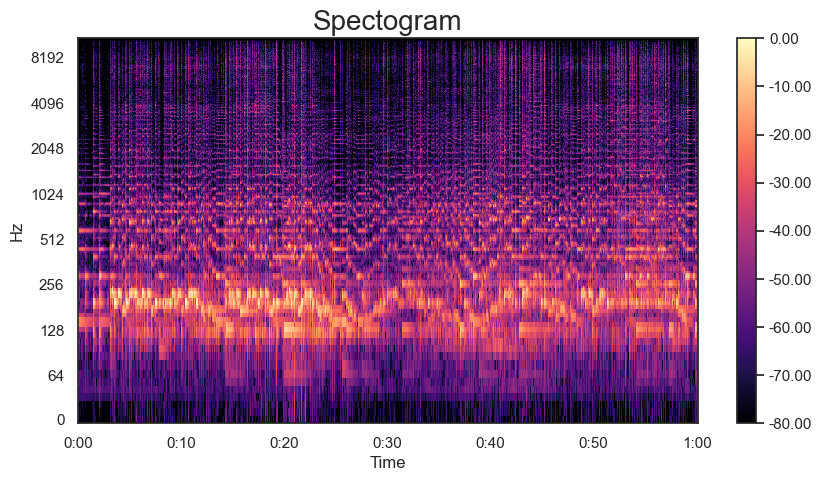

In [30]:
#Now to plot the transformed audio data
fig, ax=plt.subplots(figsize=(10,5))
img=librosa.display.specshow(S_db,
                             x_axis="time",
                             y_axis="log",
                             ax=ax)
ax.set_title('Spectogram', fontsize=20)
fig.colorbar(img,ax=ax,format=f'%0.2f')
plt.show()

### Mel Spectogram


In [31]:
S=librosa.feature.melspectrogram(y=y,
                                 sr=sr,
                                 n_mels=128*2,)
S_db_mel=librosa.amplitude_to_db(S,ref=np.max)

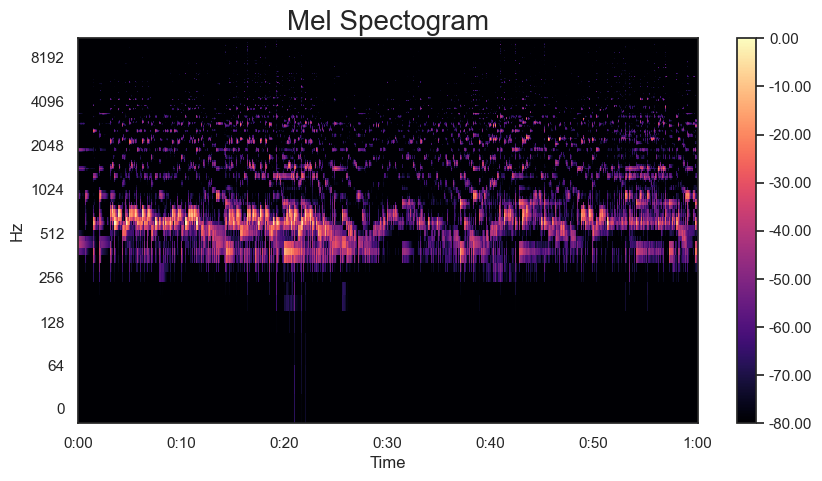

In [32]:
fig, ax = plt.subplots(figsize=(10, 5))
# Plot the mel spectogram
img = librosa.display.specshow(S_db_mel,
                              x_axis='time',
                              y_axis='log',
                              ax=ax)
ax.set_title('Mel Spectogram', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()